These calculations estimate the optimal thickness of insulation for a simplified refrigerator model.  The life-cycle cost considers both the first cost of purchasing insulation and the operational cost of buying electricity to power the refrigerator.  We assume that the other costs (exterior, compressor, etc.) are fixed with the insulation thickness and therefore do not affect the optimum thickness.

$$ 
\textrm{Life Cycle Cost} 
= \textrm{Captial Cost} + \textrm{Operational Cost}
$$

$$ \textrm{Captial Cost (USD/year)} = \textrm{Initial Cost (USD)} \cdot \textrm{Cost of Capital (1/year)} $$

$$ \textrm{Operational Cost (USD/year)} = 
\textrm{Energy Use (kWh/year)} \cdot \textrm{Electricity Cost (USD/kWh)} $$

The initial cost is based on the volume of insulation and the operational cost is based on the resulting energy use.  As the volume of insulation increases, the capital cost rises and the operational cost decreases.

Below are the assumptions in the calculation.

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pint import UnitRegistry
u = UnitRegistry()

#assumptions
# polyurethane foam
k = 0.02 * u.watt / u.meter / u.degK
# cost for polyurethane spray foam 
insulation_cost = 400 / u.meter**3
# cost of capital
CRF = 0.3
# refrigeration coefficient of performance
COP = 2.0
energy_cost = 0.15 / u.kWh
delta_T = 20 * u.degK

# 100 liter volume refrigerator
r1 = 0.288
r2 = np.linspace(1.05 * r1, 1.5 * r1, 100)
r1 = r1 * u.meter
r2 = 0.5 * u.meter
interior_volume = 4 / 3 * np.pi * r1**3

Here I calculate the life cycle cost based on the assumptions above.  For simplicity, I assume a spherical cabinet  where the thermal resistance is given by


$$ R_{sphere} = \frac{1}{4\pi k} [ \frac{1}{r_1} - \frac{1}{r_2} ] $$

and the volume of insulation is given by

$$V_{insulation} = \frac{4 \pi}{3} (r_2^3 - r_1^3)$$

There are several other assumptions for insulation cost, cost of capital, and heat pump efficiency.

In [51]:
# make this a proper ufunc?
# pass all values in

#def get_life_cycle_cost(r1, r2, k, delta_T, insulation_cost, energy_cost, COP):
def get_life_cycle_cost():
    
    # computes the thermal resistance and conductance
    thermal_resistance = (1/r1 - 1/r2) / 4 / np.pi / k
    thermal_conductance = 1 / thermal_resistance
    power = thermal_conductance * delta_T
    
    # insulation cost
    volume_insulation = (r2**3 - r1**3) * 4 * np.pi / 3
    cost_insulation = volume_insulation * insulation_cost
    
    # yearly costs
    capital_cost = cost_insulation * CRF
    operational_cost = power * 1 * u.year / COP * energy_cost 
    life_cycle_cost = capital_cost + operational_cost
    return life_cycle_cost

## Insulation thickness for inexpensive electricity

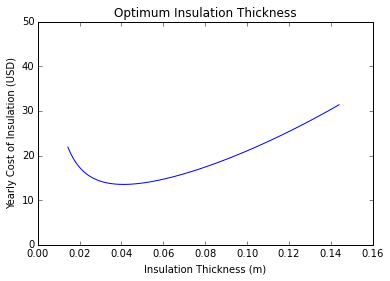

In [52]:
energy_cost = 0.15 / u.kWh
r1 = 0.288
r2 = np.linspace(1.05 * r1, 1.5 * r1, 100) * u.meter
r1 = r1 * u.meter
plt.plot(r2-r1, get_life_cycle_cost())
plt.xlabel('Insulation Thickness (m)')
plt.ylabel('Yearly Cost of Insulation (USD)');plt.ylim((0, 50))
plt.title('Optimum Insulation Thickness')
plt.show()

This is surprisingly close the the thickness you can observe in a commercially available refrigerator.  Keep in mind that it is sensitive to the cost of electricity and the efficiency of the heat pump.

# Insulation thickness for expensive electricity

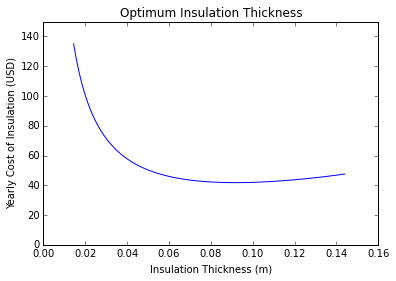

In [53]:
energy_cost = 1.0 / u.kWh
plt.plot(r2-r1, get_life_cycle_cost())
plt.xlabel('Insulation Thickness (m)')
plt.ylabel('Yearly Cost of Insulation (USD)');plt.ylim((0,150))
plt.title('Optimum Insulation Thickness')
plt.show()

We notice that at higher electricity cost, the yearly cost increases and we must have a better insulated cabinet.  Keep in mind that the yearly cost does not include the other refrigeration components so it is an underestimation. 

Insulation is usually the most cost-effective approach to lowering life-cycle costs for refrigeration.  However, since traditional blown polyurethane insulation is relatively expensive, higher electricity costs mean the yearly cost of refrigeration is expensive even for efficient refrigerators.  At some point, the high cost of electricity in many rural markets will make the cost of refrigeration services to expensive for the local customers.